## Data Chronicles: Pollution Visualization in Veneto and Thermal Imaging

#### 1. Import Libraries and Load Data

In [52]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.image as mpimg
import plotly.express as px
import plotly.graph_objects as go
import json

In [53]:
# Paths to data files
thermal_image_path = "/content/FLIR_00021.jpeg"
geojson_path = "/content/limits_IT_provinces.geojson"
csv_path = "/content/polveri.csv"


array([[  3,   4,   4, ...,  10,   9,   9],
       [  4,   5,   5, ...,  11,  10,  10],
       [  5,   6,   7, ...,  12,  12,  11],
       ...,
       [228, 229, 229, ..., 226, 226, 226],
       [228, 228, 228, ..., 226, 226, 226],
       [227, 227, 228, ..., 226, 226, 226]], dtype=uint8)
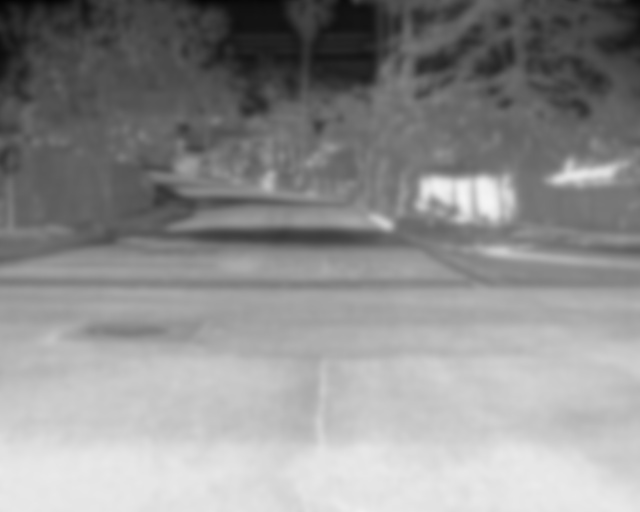

In [56]:
# Loading thermal image
thermal_image = mpimg.imread(thermal_image_path)
thermal_image

In [58]:
# Loading geospatial and pollution data
province_geojson = gpd.read_file(geojson_path)
pollution_data = pd.read_csv(csv_path)
pollution_data.head()

,Provincia,Comune,Stazionediriferimento,CodiceStazione,Tipologiastazione,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Belluno,Belluno,BL_ParcoCittàdiBologna,IT1594A,FU,22.0,19.0,17.0,16.0,16.0,14.0,15.0,13.0,15.0,14.0,13.0,13.0,13.0,14.0
1,Belluno,Feltre,AreaFeltrina,IT1619A,FU/FS,27.0,24.0,25.0,23.0,22.0,18.0,21.0,20.0,21.0,18.0,18.0,19.0,16.0,16.0
2,Padova,Padova,PD_Mandria,IT1453A,FU,32.0,31.0,34.0,32.0,28.0,24.0,31.0,30.0,34.0,27.0,24.0,25.0,21.0,23.0
3,Padova,Padova,PD_aps1,99902,IU,32.0,33.0,37.0,29.0,27.0,23.0,28.0,25.0,29.0,26.0,26.0,28.0,24.0,25.0
4,Padova,Padova,PD_aps2,99903,IU,29.0,26.0,29.0,28.0,26.0,22.0,28.0,24.0,26.0,24.0,24.0,25.0,22.0,24.0


#### 2. Check and Handle Missing Values

In [60]:
# Checking for missing values in pollution data
print("\nMissing Values in Pollution Data:\n", pollution_data.isnull().sum())





Missing Values in Pollution Data:
 Provincia                0
Comune                   0
Stazionediriferimento    0
CodiceStazione           0
Tipologiastazione        0
2009                     0
2010                     0
2011                     0
2012                     0
2013                     0
2014                     0
2015                     0
2016                     0
2017                     0
2018                     0
2019                     0
2020                     0
2021                     0
2022                     0
dtype: int64


In [61]:
# Filling missing values with 0
pollution_data.fillna(0, inplace=True)
print("\nMissing values after filling with 0:\n", pollution_data.isnull().sum())




Missing values after filling with 0:
 Provincia                0
Comune                   0
Stazionediriferimento    0
CodiceStazione           0
Tipologiastazione        0
2009                     0
2010                     0
2011                     0
2012                     0
2013                     0
2014                     0
2015                     0
2016                     0
2017                     0
2018                     0
2019                     0
2020                     0
2021                     0
2022                     0
dtype: int64


In [62]:
# Checking for missing values in geospatial data
print("\nMissing Values in Geospatial Data:\n", province_geojson.isnull().sum())


Missing Values in Geospatial Data:
 prov_name              0
prov_istat_code_num    0
prov_acr               0
reg_name               0
reg_istat_code         0
reg_istat_code_num     0
prov_istat_code        0
geometry               0
dtype: int64


#### 3. Display Thermal Image with Contours


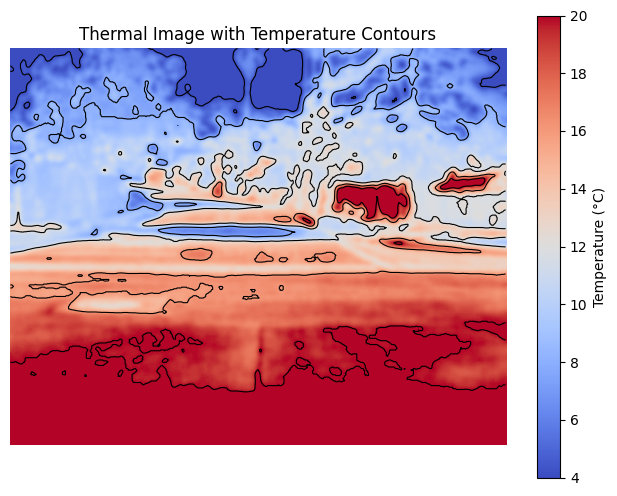

In [63]:
def display_thermal_with_contours(data):
    """
    Function to display thermal image with temperature contours.
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(data, cmap='coolwarm', vmin=4, vmax=20)
    plt.colorbar(label="Temperature (°C)")

    # Add contour lines at specific temperature levels
    contour_levels = [4, 8, 12, 16, 20]
    plt.contour(data, levels=contour_levels, colors='black', linewidths=0.8)
    plt.title("Thermal Image with Temperature Contours")
    plt.axis('off')
    plt.show()

# Convert image to temperature data
temperature_data = np.array(thermal_image) * 0.1

# Display the thermal image
display_thermal_with_contours(temperature_data)


#### 4. Reshape Pollution Data


In [64]:
pollution_long = pd.melt(
    pollution_data,
    id_vars=['Provincia', 'Comune', 'Stazionediriferimento', 'CodiceStazione', 'Tipologiastazione'],
    value_vars=[str(year) for year in range(2009, 2022 + 1)],  # Years 2009 to 2022
    var_name='year',
    value_name='days_exceeded'
)

pollution_long['year'] = pollution_long['year'].astype(int)
print("\nReshaped Pollution Data (2009-2022):\n", pollution_long.head())



Reshaped Pollution Data (2009-2022):
   Provincia   Comune   Stazionediriferimento CodiceStazione Tipologiastazione  \
0   Belluno  Belluno  BL_ParcoCittàdiBologna        IT1594A                FU   
1   Belluno   Feltre            AreaFeltrina        IT1619A             FU/FS   
2    Padova   Padova              PD_Mandria        IT1453A                FU   
3    Padova   Padova                 PD_aps1          99902                IU   
4    Padova   Padova                 PD_aps2          99903                IU   

   year  days_exceeded  
0  2009           22.0  
1  2009           27.0  
2  2009           32.0  
3  2009           32.0  
4  2009           29.0  


#### 5. Calculate Pollution Changes (2012 vs 2022)


In [65]:
# Standardizing column names to lowercase and strip whitespace
pollution_long.columns = pollution_long.columns.str.lower().str.strip()

# Groupping by province and calculate average pollution levels for 2012 and 2022
pollution_2012 = pollution_long[pollution_long['year'] == 2012].groupby('provincia')['days_exceeded'].mean().reset_index()
pollution_2022 = pollution_long[pollution_long['year'] == 2022].groupby('provincia')['days_exceeded'].mean().reset_index()

# Merging 2012 and 2022 data
pollution_comparison = pd.merge(pollution_2012, pollution_2022, on="provincia", suffixes=("_2012", "_2022"))
pollution_comparison["change"] = pollution_comparison["days_exceeded_2022"] - pollution_comparison["days_exceeded_2012"]
print("\nPollution Comparison (2012 vs 2022):\n", pollution_comparison.head())



Pollution Comparison (2012 vs 2022):
   provincia  days_exceeded_2012  days_exceeded_2022     change
0   Belluno               19.50           15.000000  -4.500000
1    Padova               17.80           21.200000   3.400000
2    Rovigo               22.00            7.666667 -14.333333
3   Treviso               19.50           18.000000  -1.500000
4   Venezia               11.25           16.000000   4.750000


#### 6. Filter and Merge Geospatial Data for Veneto


In [66]:
# List of Veneto provinces
veneto_provinces = ['belluno', 'padova', 'rovigo', 'treviso', 'venezia', 'verona', 'vicenza']

# Standardizing province names in geospatial data
province_geojson['provincia'] = province_geojson['prov_name'].str.lower().str.strip()

# Filtering geospatial data to Veneto provinces only
veneto_geojson = province_geojson[province_geojson['provincia'].isin(veneto_provinces)]

# Merging geospatial data with pollution data
merged_data = veneto_geojson.merge(pollution_comparison, on="provincia", how="left")

# Filling NaNs with 0 for display purposes
merged_data.fillna({'days_exceeded_2022': 0, 'change': 0}, inplace=True)
print("\nMerged Data for Veneto Provinces:\n", merged_data.head())



Merged Data for Veneto Provinces:
   prov_name  prov_istat_code_num prov_acr reg_name reg_istat_code  \
0    Verona                   23       VR   Veneto             05   
1   Vicenza                   24       VI   Veneto             05   
2   Belluno                   25       BL   Veneto             05   
3   Treviso                   26       TV   Veneto             05   
4   Venezia                   27       VE   Veneto             05   

   reg_istat_code_num prov_istat_code  \
0                   5             023   
1                   5             024   
2                   5             025   
3                   5             026   
4                   5             027   

                                            geometry provincia  \
0  POLYGON ((11.33151 45.38763, 11.33084 45.38717...    verona   
1  POLYGON ((11.61227 45.3254, 11.61449 45.31729,...   vicenza   
2  POLYGON ((11.94587 45.90805, 11.95053 45.89579...   belluno   
3  POLYGON ((11.80324 45.79994, 11.794

#### 7. Choropleth Map of Pollution Levels in 2022



In [67]:
# Converting geospatial data to GeoJSON dictionary
geojson_dict = json.loads(veneto_geojson.to_json())

# Choropleth Map for Pollution in 2022
fig_choropleth = px.choropleth(
    merged_data,
    geojson=geojson_dict,
    locations='provincia',
    featureidkey="properties.provincia",
    color='days_exceeded_2022',
    hover_name='provincia',
    labels={'days_exceeded_2022': 'Days Exceeded (2022)'},
    color_continuous_scale='YlOrRd',
    title="Pollution Levels in Veneto Provinces (2022)"
)
fig_choropleth.update_geos(fitbounds="locations", visible=False)
fig_choropleth.show()


#### 8. Add Symbol Map for Pollution Change



In [68]:
# Reprojecting to EPSG:3857 for accurate centroid calculation
merged_data = merged_data.to_crs(epsg=3857)

# Calculating centroids
merged_data["centroid"] = merged_data.geometry.centroid

# Reprojecting back to WGS84 (EPSG:4326)
merged_data = merged_data.to_crs(epsg=4326)
merged_data["lat"] = merged_data.centroid.y
merged_data["lon"] = merged_data.centroid.x

# Calculating the center point for zooming
lat_center = merged_data['lat'].mean()  # Center latitude
lon_center = merged_data['lon'].mean()  # Center longitude

# Creating the symbol map with markers
fig = go.Figure(go.Scattermapbox(
    lon=merged_data['lon'],
    lat=merged_data['lat'],
    mode='markers',
    marker=go.scattermapbox.Marker(
        size=merged_data['days_exceeded_2022'] * 3,
        color=merged_data['change'],
        colorscale='RdYlGn',
        showscale=True,
        cmin=-max(abs(merged_data['change'])),
        cmax=max(abs(merged_data['change']))
    ),
    text=merged_data['provincia'] + "<br>Change: " + merged_data['change'].astype(str),
    hoverinfo="text"
))

# Layout with map styling and center
fig.update_layout(
    mapbox_style="open-street-map",
    mapbox_center={"lat": lat_center, "lon": lon_center},
    mapbox_zoom=8,
    title="Pollution Change in Veneto (2012 vs 2022)"
)
fig.show()


<ipython-input-68-848cc495f6f6>:9: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


<ipython-input-68-848cc495f6f6>:10: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




#### 9. Additional Information



In [69]:
print("CRS of Geospatial Data:", veneto_geojson.crs)
print("CRS of Merged Data:", merged_data.crs)
print("Latitude Range:", merged_data['lat'].min(), "-", merged_data['lat'].max())
print("Longitude Range:", merged_data['lon'].min(), "-", merged_data['lon'].max())


CRS of Geospatial Data: EPSG:4326
CRS of Merged Data: EPSG:4326
Latitude Range: 45.010459914350854 - 46.30967256315173
Longitude Range: 11.036324615425004 - 12.45767660807279
